# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- (YOUR)MY CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return ((np.matmul(X, w) - y)**2).sum() / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- (YOUR)MY CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return 2 * np.matmul(X.T, (np.matmul(X, w) - y)) / y.shape[0]

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- (YOUR)MY CODE HERE --
    w = np.array(w_init, copy=True)
    ans = []
    ans.append(w.copy())
    for i in range(1, n_iterations):
        w -= lr * loss.calc_grad(X, y, w)
        ans.append(w.copy())
    return ans

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649652


In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    #plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    #plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

### **My answer:**

* *с увеличением длины шага - градиентный спуск становится **менее плавным**, т.е. **более резким** ("скакающим" вверх-вниз)*

P.S. при большом **`lr`** градиентный спуск похож на пульс перед сдачей домашки в попытках всё успеть за последние минуты *:D*

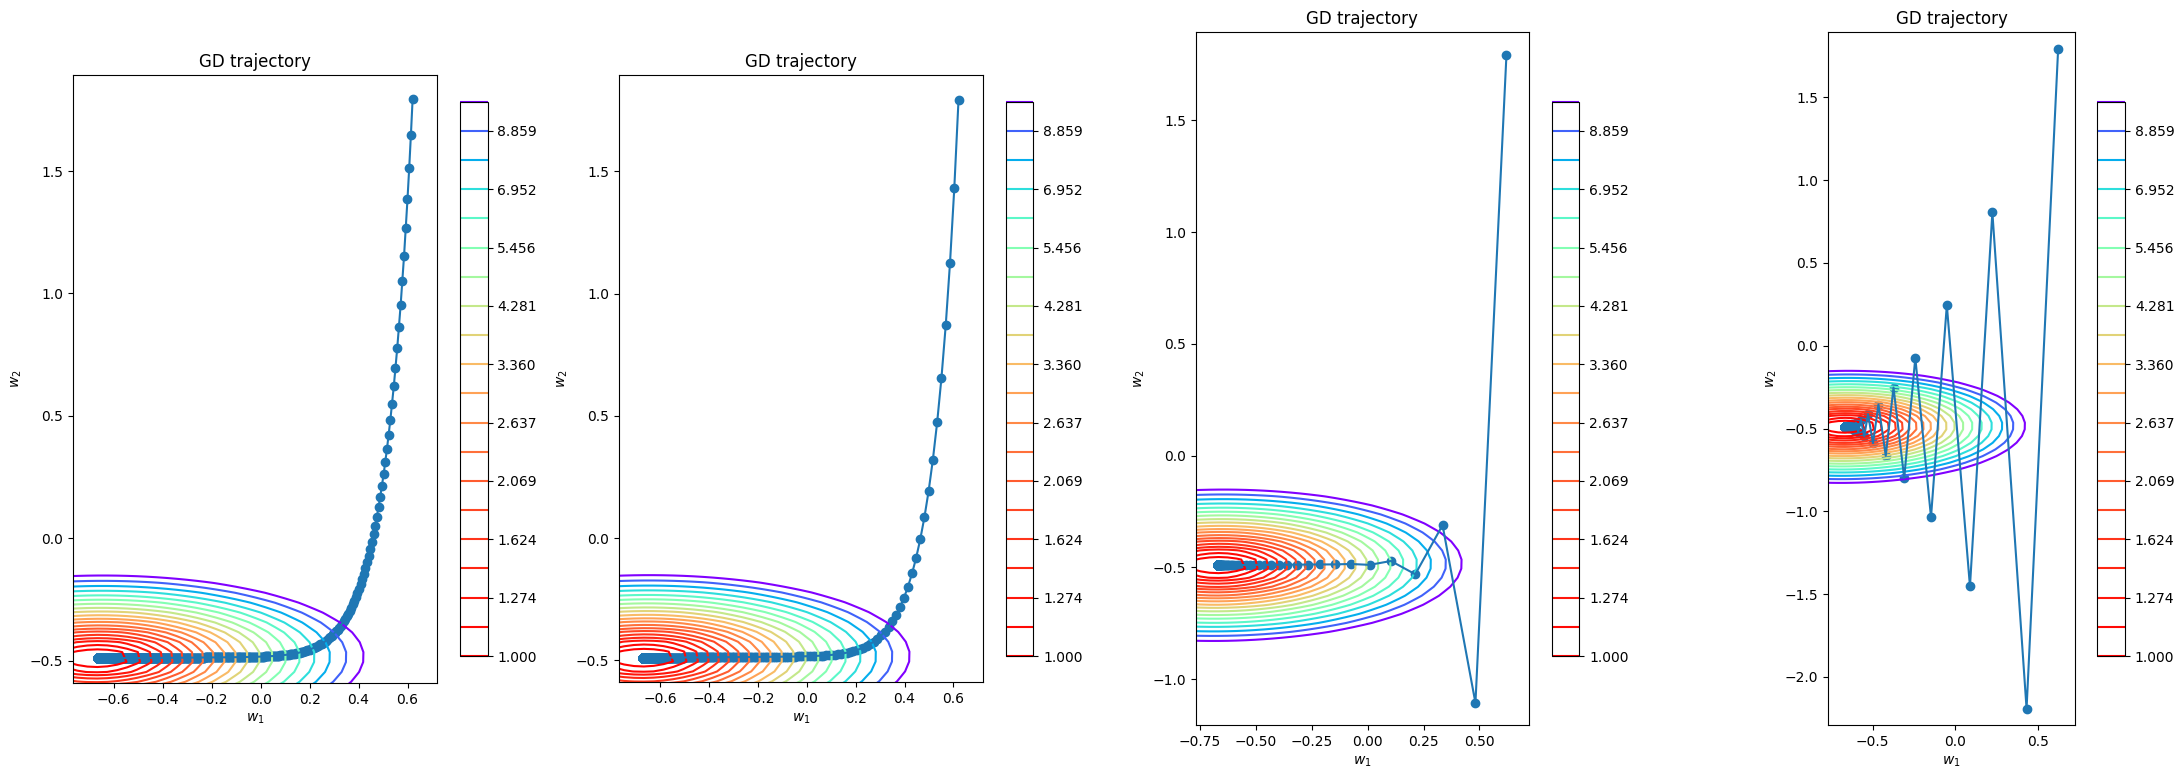

In [ ]:
# -- (YOUR)MY CODE HERE --
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 4)
plt.figure(figsize=(27, 9))
lr_mas = [0.0004, 0.001, 0.008, 0.011]

for lr, grd in zip(lr_mas, [0, 1, 2, 3]):
    plt.subplot(gs[0, grd])
    plot_gd(gradient_descent(w_init, X, y, loss, lr, 1000), X, y, loss)
plt.show()

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- (YOUR)MY CODE HERE --
    w = np.array(w_init, copy=True)
    ans = []
    ans.append(w.copy())
    for i in range(1, n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w -= lr * loss.calc_grad(batch, y[batch_indices], w)
        ans.append(w.copy())
    return ans

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

### **My answer:**

* *с увеличением длины шага - стохастический градиентный спуск становится **более резким**, а с увеличением размера подвыборки - становится **менее "сумасшедшим"** =) и больше похожим на обычный градиентный спуск*

* ***SGD*** *вычисляет градиент на некоторой случайной подвыборке, что **может** значительно **сократить время** вычисления градиента (тем самым **улучшая обычный GD**), но **SGD может привести** к различного рода **"приколам"**, например, **может не сойтись**, или в случае большой длины шага и маленьким размером подвыборки мы **можем наблюдать полнейший ужас и вакханалию...** (но забавную :) )*

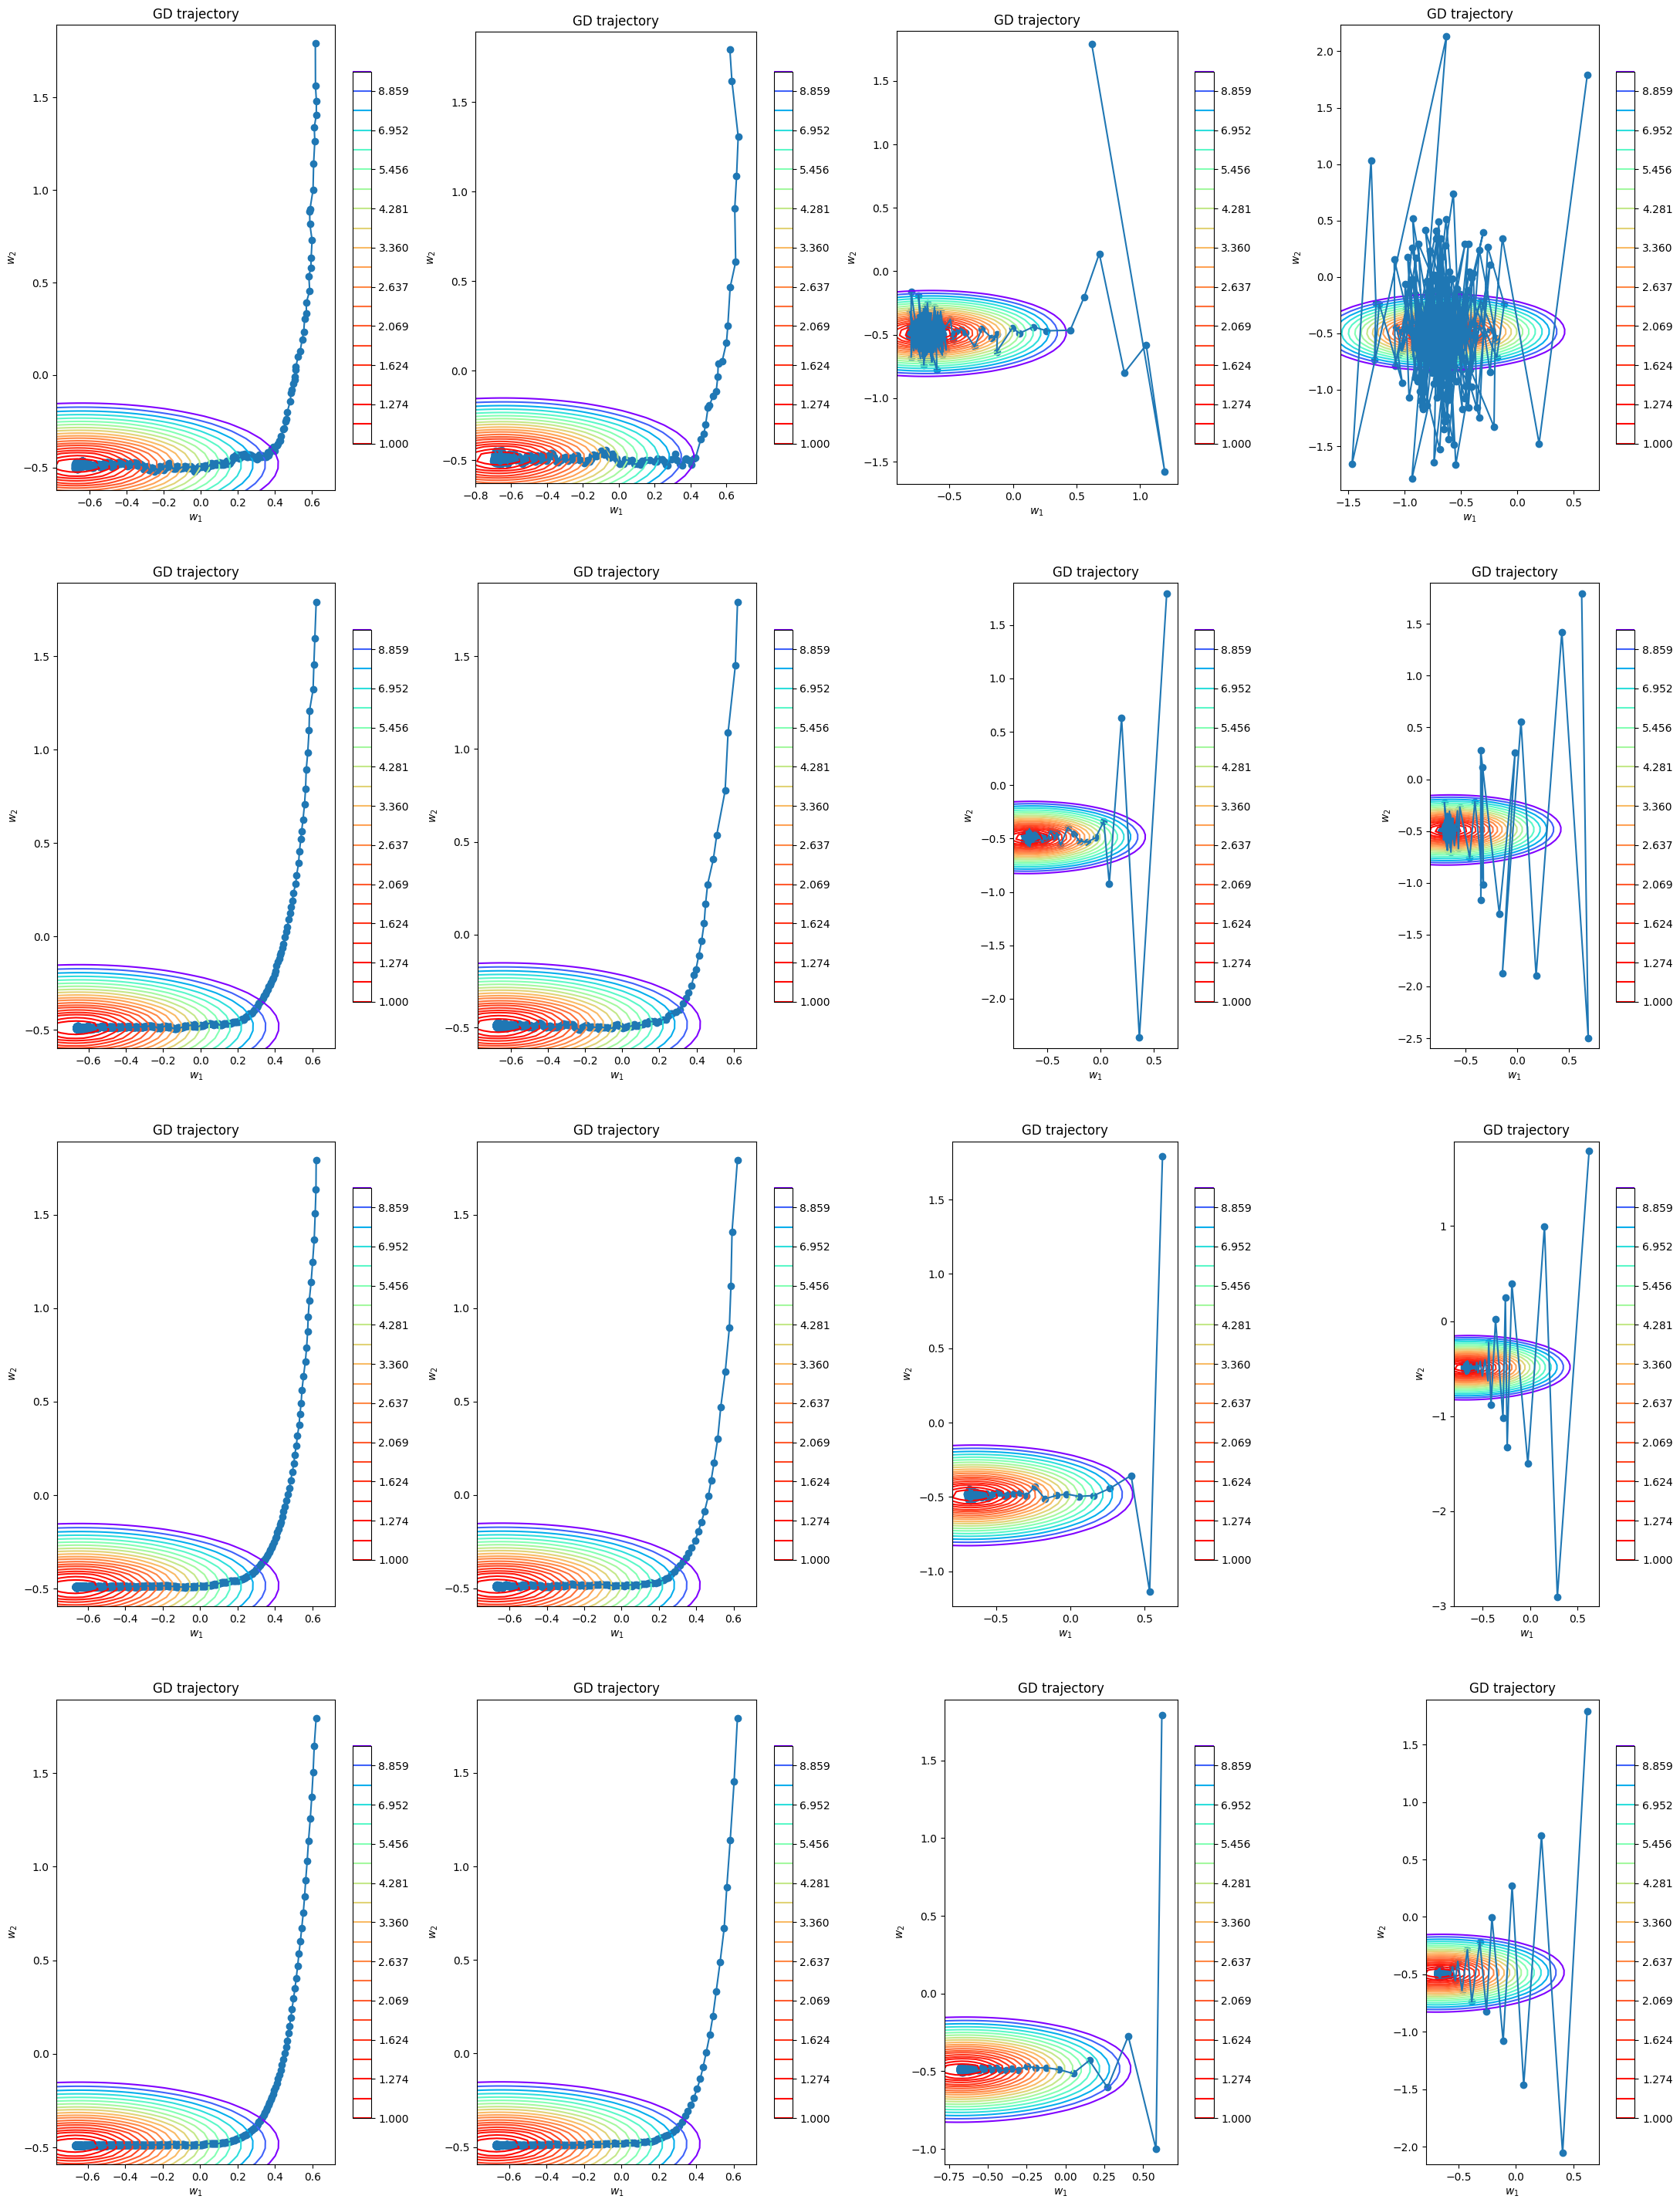

In [ ]:
# -- (YOUR)MY CODE HERE --
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(4, 4)
plt.figure(figsize=(27, 9*4))
lr_mas = [0.0004, 0.001, 0.008, 0.011]*4
batch_size_mas = [5]*4 + [30]*4 + [100]*4 + [180]*4

for lr, batch_size, grd in zip(lr_mas, batch_size_mas, itertools.product([0, 1, 2, 3], repeat=2)):
    plt.subplot(gs[grd[0], grd[1]])
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, 1000), X, y, loss)
plt.show()    

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- (YOUR)MY CODE HERE --
    w = np.array(w_init, copy=True)
    ans = []
    ans.append(w.copy())
    for i in range(1, n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        new_lr = lr * ((1 / (1 + i))**p)
        w -= new_lr * loss.calc_grad(batch, y[batch_indices], w)
        ans.append(w.copy())
    return ans

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

### **My answer:**

* *с увеличением `p` SGD с затухающим шагом резче сходится на начальных итерациях*

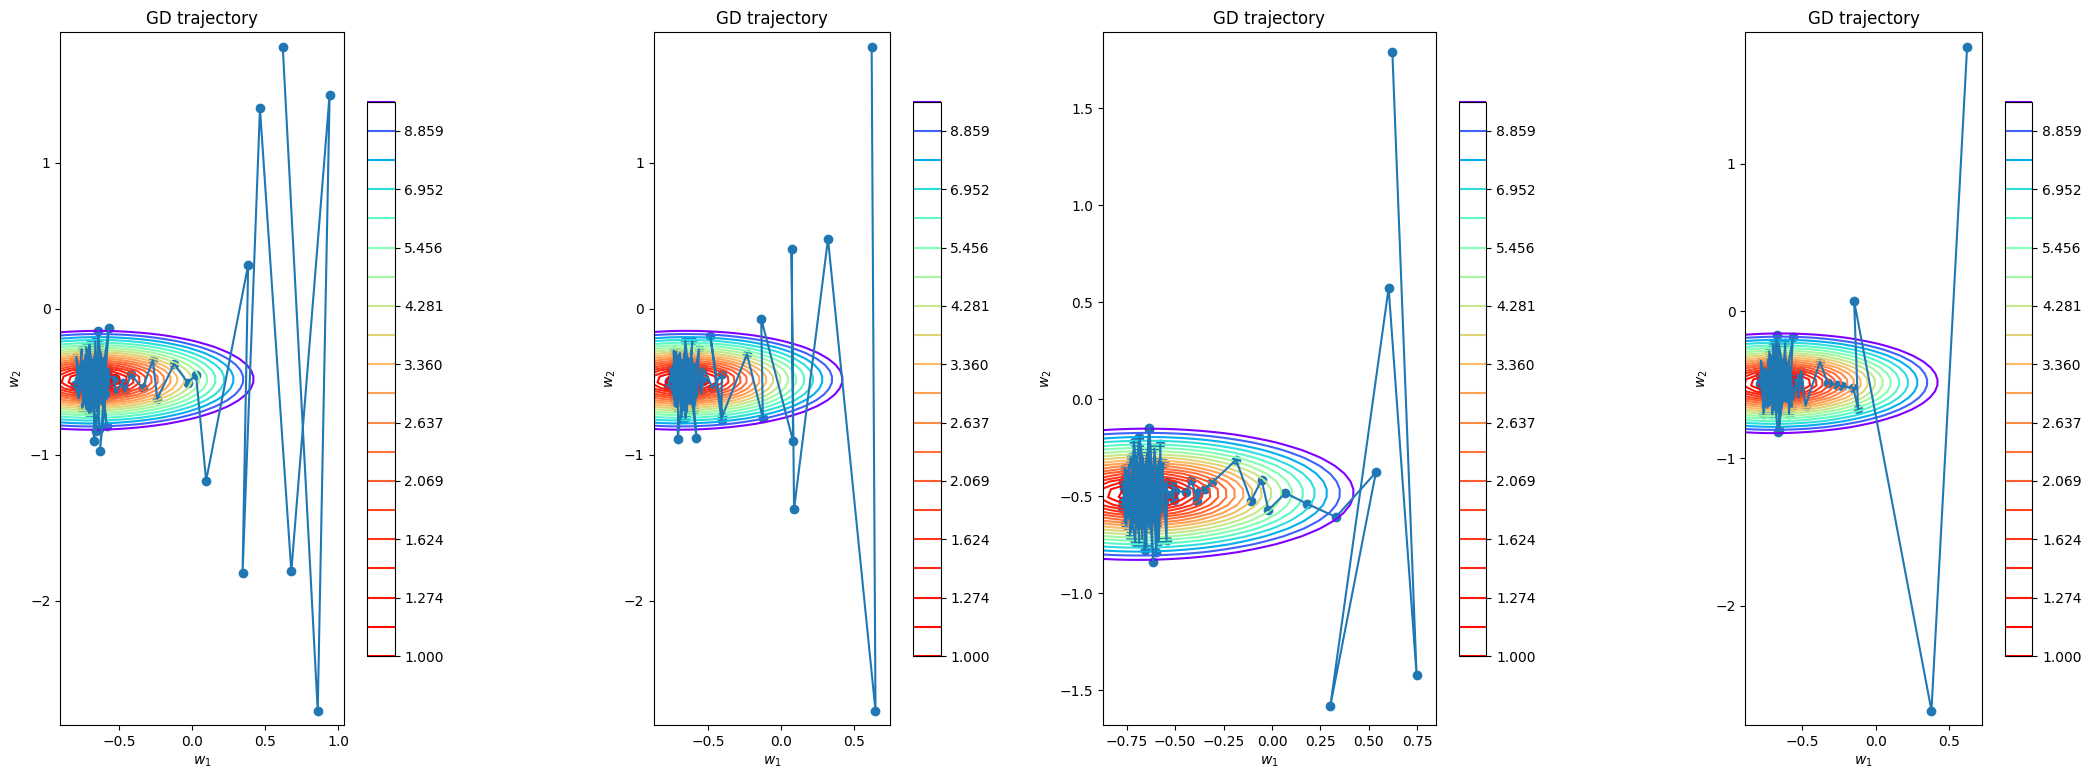

In [ ]:
# -- (YOUR)MY CODE HERE --
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(1, 4)
plt.figure(figsize=(27, 9))
p_mas = [0.1, 0.4, 0.7, 1]

for p, grd in zip(lr_mas, [0, 1, 2, 3]):
    plt.subplot(gs[0, grd])
    plot_gd(stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, 1000), X, y, loss)
plt.show()

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

### **My answer:**

* *SGD лучше и быстрее сходится на начальных итерациях, а GD при большом количестве итераций, в конечном счёте лучше сходится*
* *преимущество SGD видно на начальных итерациях и если нам важна скорость, то SGD несомненно лучше ; также SGD лучше, потому что он способен перескочить локальные минимумы и, возможно, найти глобальный минимум*

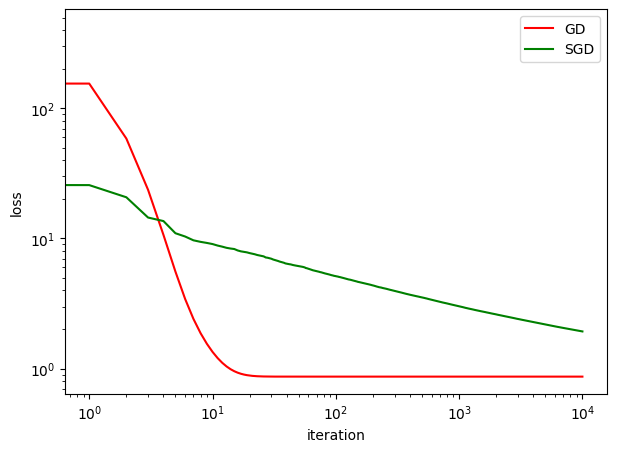

In [ ]:
# -- (YOUR)MY CODE HERE --
#fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plt.figure(figsize=(7, 5))

w_GD = gradient_descent(w_init, X, y, loss, 0.01, 10000)
w_SGD = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 1, 10000)
loss_GD = list(map(lambda w_tGD: loss.calc_loss(X, y, w_tGD), w_GD))
loss_SGD = list(map(lambda w_tSGD: loss.calc_loss(X, y, w_tSGD), w_SGD))

plt.plot(range(10000), loss_GD, color='red')
plt.plot(range(10000), loss_SGD, color='green')
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend(["GD", "SGD"])
plt.xscale("log")
plt.yscale("log")

plt.show()

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- (YOUR)MY CODE HERE --
        w_init = np.random.uniform(-1000, 1000, (X.shape[1]))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, 1000)[-1]

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- (YOUR)MY CODE HERE --
        return np.matmul(X, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
# -- (YOUR)MY CODE HERE --
'''
Здесь представлена ВСЯ обработка в ОДНОЙ ячейке
Ниже скрыто то, как я делал эту обработку ПО ШАГАМ
'''

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler      # нормализовать буду MinMaxScaler'ом
from sklearn.preprocessing import OneHotEncoder     # будем делать OneHot кодирование

np.random.seed(1337)
X_raw = X_raw.drop("index", axis=1)     # удаляем колонку index
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)        # делим на train и test

# числовые признаки заполнил средним, а категориальный - часто встречаемой категорией
category_mask = (X_train.dtypes == 'object').values     # создаём маску столбцов категориальных признаков

means = X_train[X_train.columns[~category_mask]].mean()     # находим среднее для каждого ЧИСЛОВОГО столбца
X_train[X_train.columns[~category_mask]] = X_train[X_train.columns[~category_mask]].fillna(means)       # заполняем ими трейн
X_test[X_test.columns[~category_mask]] = X_test[X_test.columns[~category_mask]].fillna(means)           #                   и тест соответственно

popular = X_train[X_train.columns[category_mask]].mode().loc[0]     # находим часто встречаемую категорию для каждого КАТЕГОРИАЛЬНОГО столбца
X_train[X_train.columns[category_mask]] = X_train[X_train.columns[category_mask]].fillna(popular)       # заполняем ими трейн
X_test[X_test.columns[category_mask]] = X_test[X_test.columns[category_mask]].fillna(popular)           #                   и тест соответственно

X_train_num = X_train[X_train.columns[~category_mask]]      # выделяем числовые признаки в train
X_test_num = X_test[X_test.columns[~category_mask]]         # выделяем числовые признаки в test

zoomer = MinMaxScaler().fit(X_train_num)        # нормализуем..
X_train[X_train_num.columns] = pd.DataFrame(data=zoomer.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
X_test[X_test_num.columns] = pd.DataFrame(data=zoomer.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

X_train_cat = X_train[X_train.columns[category_mask]]      # выделяем категориальные признаки в train
X_test_cat = X_test[X_test.columns[category_mask]]         # выделяем категориальные признаки в test

enc = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)     # кодируем..
X_train_coded = pd.DataFrame(data=enc.transform(X_train_cat).toarray(), index=X_train_cat.index, columns=enc.get_feature_names_out())
X_test_coded = pd.DataFrame(data=enc.transform(X_test_cat).toarray(), index=X_test_cat.index, columns=enc.get_feature_names_out())

X_train = X_train.drop(columns=X_train_cat.columns)      # удаляем категориальных столбцы из train
X_test = X_test.drop(columns=X_test_cat.columns)         #                               и из test

X_train = X_train.join(X_train_coded)       # 'добавляем' результат OneHot кодирования к train
X_test = X_test.join(X_test_coded)          #                                       и к test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


((140, 61), (140,), (61, 61), (61,))

##### **По шагово:**

In [ ]:
X_raw.head()    # видим колонку index -- она нам не нужна

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [ ]:
X_raw = X_raw.drop("index", axis=1)
X_raw.head()        # проверяем, что удалилось

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22


In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(1337)
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3)        # делим на train и test

In [ ]:
X_raw.isna().sum().sum()  # есть Nan'ы -- работаем

51

In [ ]:
# числовые признаки заполнил средним, а категориальный - часто встречаемой категорией
category_mask = (X_train.dtypes == 'object').values     # создаём маску столбцов категориальных признаков

means = X_train[X_train.columns[~category_mask]].mean()     # находим среднее для каждого ЧИСЛОВОГО столбца
X_train[X_train.columns[~category_mask]] = X_train[X_train.columns[~category_mask]].fillna(means)       # заполняем ими трейн
X_test[X_test.columns[~category_mask]] = X_test[X_test.columns[~category_mask]].fillna(means)           #                   и тест соответственно

popular = X_train[X_train.columns[category_mask]].mode().loc[0]     # находим часто встречаемую категорию для каждого КАТЕГОРИАЛЬНОГО столбца
X_train[X_train.columns[category_mask]] = X_train[X_train.columns[category_mask]].fillna(popular)       # заполняем ими трейн
X_test[X_test.columns[category_mask]] = X_test[X_test.columns[category_mask]].fillna(popular)           #                   и тест соответственно

X_train.isna().sum().sum(), X_test.isna().sum().sum()       # проверяем -- всё по нулям, всё круто!

(0, 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler      # нормализовать буду MinMaxScaler'ом

X_train_num = X_train[X_train.columns[~category_mask]]      # выделяем числовые признаки в train
X_test_num = X_test[X_test.columns[~category_mask]]         # выделяем числовые признаки в test

zoomer = MinMaxScaler().fit(X_train_num)
X_train[X_train_num.columns] = pd.DataFrame(data=zoomer.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
X_test[X_test_num.columns] = pd.DataFrame(data=zoomer.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

pd.concat([X_train.head(), X_test.head()])      # проверяем, что нормализация прошла успешно

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
28,1.0,0.418848,dodge,gas,turbo,two,hatchback,fwd,front,0.271137,...,four,0.384615,mfi,0.757143,0.871429,0.00000,0.610063,0.346939,0.151515,0.216216
85,0.2,0.376963,mitsubishi,gas,std,four,sedan,fwd,front,0.282799,...,four,0.198381,spdi,0.450000,0.661905,0.03125,0.427673,0.551020,0.272727,0.378378
53,1.0,0.445026,mazda,gas,std,two,hatchback,rwd,front,0.253644,...,two,0.036437,4bbl,0.574717,0.561288,0.15000,0.333333,0.755102,0.090909,0.189189
184,0.8,0.151832,volkswagen,gas,std,four,sedan,fwd,front,0.311953,...,four,0.194332,mpfi,0.464286,0.633333,0.18750,0.327044,0.551020,0.363636,0.432432
186,1.0,1.000000,volkswagen,gas,std,two,hatchback,fwd,front,0.230321,...,four,0.194332,mpfi,0.464286,0.633333,0.09375,0.264151,0.551020,0.303030,0.351351
29,0.8,0.376963,honda,gas,std,two,hatchback,fwd,front,0.000000,...,four,0.125506,1bbl,0.264286,0.638095,0.16250,0.062893,0.265306,1.060606,1.027027
119,0.6,0.465969,plymouth,gas,std,four,sedan,fwd,front,0.206997,...,four,0.149798,2bbl,0.307143,0.552381,0.15000,0.125786,0.551020,0.515152,0.594595
69,1.0,0.403141,mercedes-benz,gas,std,two,convertible,rwd,front,0.291545,...,eight,0.700405,mpfi,0.657143,0.490476,0.08125,0.672956,0.244898,0.060606,0.054054
175,1.0,0.691099,toyota,gas,std,two,hatchback,rwd,front,0.475219,...,six,0.445344,mpfi,0.521429,0.609524,0.14375,0.710692,0.428571,0.151515,0.216216
97,0.4,0.214660,nissan,gas,std,four,sedan,fwd,front,0.309038,...,four,0.238866,2bbl,0.564286,0.666667,0.09375,0.308176,0.428571,0.393939,0.486486


In [ ]:
from sklearn.preprocessing import OneHotEncoder     # будем делать OneHot кодирование

X_train_cat = X_train[X_train.columns[category_mask]]      # выделяем категориальные признаки в train
X_test_cat = X_test[X_test.columns[category_mask]]         # выделяем категориальные признаки в test

enc = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)     # кодируем..
X_train_coded = pd.DataFrame(data=enc.transform(X_train_cat).toarray(), index=X_train_cat.index, columns=enc.get_feature_names_out())
X_test_coded = pd.DataFrame(data=enc.transform(X_test_cat).toarray(), index=X_test_cat.index, columns=enc.get_feature_names_out())

X_train = X_train.drop(columns=X_train_cat.columns)      # удаляем категориальных столбцы из train
X_test = X_test.drop(columns=X_test_cat.columns)         #                               и из test

X_train = X_train.join(X_train_coded)       # 'добавляем' результат OneHot кодирования к train
X_test = X_test.join(X_test_coded)          #                                       и к test

In [ ]:
pd.concat([X_train.head(), X_test.head()])  # проверяем, что кодирование прошло успешно

,0,1,9,10,11,12,13,16,18,19,...,x8_four,x8_six,x8_three,x8_two,x9_2bbl,x9_4bbl,x9_idi,x9_mfi,x9_mpfi,x9_spdi
28,1.0,0.418848,0.271137,0.479104,0.512821,0.127273,0.513189,0.384615,0.757143,0.871429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
85,0.2,0.376963,0.282799,0.467164,0.435897,0.254545,0.354926,0.198381,0.450000,0.661905,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,1.0,0.445026,0.253644,0.416418,0.461538,0.072727,0.346005,0.036437,0.574717,0.561288,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
184,0.8,0.151832,0.311953,0.456716,0.444444,0.627273,0.314973,0.194332,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
186,1.0,1.000000,0.230321,0.367164,0.316239,0.236364,0.284329,0.194332,0.464286,0.633333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,0.8,0.376963,0.000000,0.052239,0.307692,0.181818,0.087277,0.125506,0.264286,0.638095,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,0.6,0.465969,0.206997,0.391045,0.299145,0.181818,0.272692,0.149798,0.307143,0.552381,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69,1.0,0.403141,0.291545,0.585075,0.871795,0.181818,0.852211,0.700405,0.657143,0.490476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
175,1.0,0.691099,0.475219,0.632836,0.632479,0.290909,0.592708,0.445344,0.521429,0.609524,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,0.4,0.214660,0.309038,0.482090,0.418803,0.536364,0.315749,0.238866,0.564286,0.666667,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### ***NEXT***

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
# -- (YOUR)MY CODE HERE --
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import mean_squared_error

# -- (YOUR)MY CODE HERE --
print("Train MSE:", mean_squared_error(y_train, linear_regression.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, linear_regression.predict(X_test)))

Train MSE: 2447185.7227889863
Test MSE: 6505996.796738273


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- (YOUR)MY CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return (((np.matmul(X, w) - y)**2).sum() / y.shape[0]) + (self.coef * ((w[:-1])**2).sum())

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- (YOUR)MY CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        return (2 * np.matmul(X.T, (np.matmul(X, w) - y)) / y.shape[0]) + (2 * self.coef * np.append(w[:-1], 0))

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.0005))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

### **My answer:**

* *ошибка на train увеличилась примерно на 100к*
* *ошибка на test уменьшилась примерно на 500к*

In [ ]:
# -- (YOUR)MY CODE HERE --
linear_regression.fit(X_train, y_train)

print("Train MSE:", mean_squared_error(y_train, linear_regression.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, linear_regression.predict(X_test)))

Train MSE: 2537643.728810411
Test MSE: 6069730.56294694


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- (YOUR)MY CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        phi_mass = list(map(lambda z: z*z / 2 if -self.eps < z < self.eps else self.eps * (np.abs(z) - self.eps / 2), np.matmul(X, w) - y))
        return sum(phi_mass) / y.shape[0]

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- (YOUR)MY CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        phi_grad_mass = np.fromiter(map(lambda z: z if -self.eps < z < self.eps else self.eps * np.sign(z), np.matmul(X, w) - y), float).reshape(-1, 1)
        return np.sum(X * phi_grad_mass, axis=0) / y.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

### **My answer:**

* *ошибка на train увеличилась примерно на 900к*
* *ошибка на test увеличилась примерно на 180к*

In [ ]:
# -- (YOUR)MY CODE HERE --
linear_regression = LinearRegression(HuberLoss(8000))

linear_regression.fit(X_train, y_train)

print("Train MSE:", mean_squared_error(y_train, linear_regression.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, linear_regression.predict(X_test)))

Train MSE: 3394802.402200593
Test MSE: 6679071.143521254


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

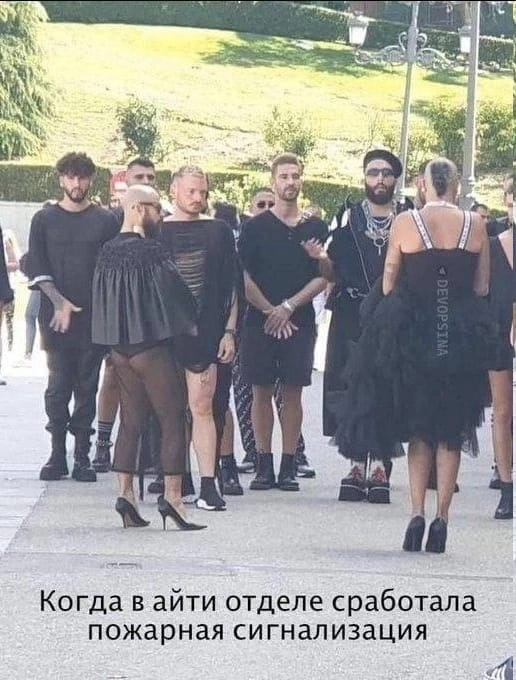

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

### **My answer:**

* *лоссы такие же*
* *сначала траектория более резкая, а с уменьшением 'температуры' становится более плавной*

In [ ]:
# -- (YOUR)MY CODE HERE --
def simulated_annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    T_start: float,
) -> List[np.ndarray]:
    """
    Алгоритм имитации отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лоссы при помощи loss.calc_loss(X, y, w)
    :param T_start: float -- начальное значение температуры
    :return: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    current_w = np.array(w_init, copy=True)
    current_loss = loss.calc_loss(X, y, current_w)
    T = T_start
    i = 1
    ans = []
    ans.append(current_w.copy())
    while(T > 0.001):
        possible_w = current_w + np.random.standard_t(3, size=current_w.shape)
        possible_loss = loss.calc_loss(X, y, possible_w)
        if (possible_loss < current_loss):
            current_w = possible_w
            current_loss = possible_loss
        else:
            p = np.exp((current_loss - possible_loss) / T)
            if (np.random.rand() <= p):
                current_w = possible_w
                current_loss = possible_loss
        ans.append(current_w.copy())
        T = T_start / i
        i += 1
    return ans

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = simulated_annealing(w_init, X, y, loss, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8675839880102736


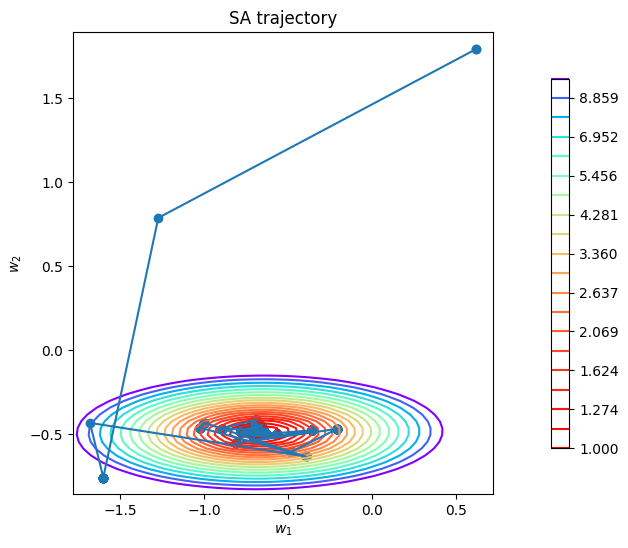

In [ ]:
plt.figure(figsize=(15, 6))
plot_gd(simulated_annealing(w_init, X, y, loss, 100), X, y, loss)
plt.title("SA trajectory")
plt.show()